In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=285f8b6337684965e7a20ba115122f37


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | mezen
Processing Record 3 of Set 1 | necochea
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | korla
Processing Record 7 of Set 1 | jardim
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | nova olinda do norte
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | asyut
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | nicoya
Processing Record 42 of Set 4 | denpasar
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | svencionys
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | iralaya
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | mut
Processing Record 49 of Set 4 | ilhabela
Processing Record 50 of Set 4 | ahmadnagar
Processing Record 1 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 2 of Set 5 | malakal
Processing Record 3 of Set 5 | arlit
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | gat
Processing Record 7 of Set 5 | lewiston
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | shahrud
Processing Record 10 of Set 5 | kocser
Processing Record 11 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 12 of Set 5 | pala

Processing Record 29 of Set 8 | vardo
Processing Record 30 of Set 8 | champerico
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | steinbach
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | jabiru
City not found. Skipping...
Processing Record 36 of Set 8 | dibaya
City not found. Skipping...
Processing Record 37 of Set 8 | larsnes
Processing Record 38 of Set 8 | changchun
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | soritor
Processing Record 41 of Set 8 | chiriguana
Processing Record 42 of Set 8 | nakhon ratchasima
Processing Record 43 of Set 8 | drumheller
Processing Record 44 of Set 8 | toliary
City not found. Skipping...
Processing Record 45 of Set 8 | carutapera
Processing Record 46 of Set 8 | tateyama
Processing Record 47 of Set 8 | nuuk
Processing Record 48 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 8 | menongue
Processing Record 50 of S

Processing Record 19 of Set 12 | nacozari
Processing Record 20 of Set 12 | myitkyina
Processing Record 21 of Set 12 | xinzhi
Processing Record 22 of Set 12 | mao
Processing Record 23 of Set 12 | hampton
Processing Record 24 of Set 12 | brigantine
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | leningradskiy
Processing Record 27 of Set 12 | mount gambier
Processing Record 28 of Set 12 | faya
Processing Record 29 of Set 12 | port-gentil
Processing Record 30 of Set 12 | pacific grove
Processing Record 31 of Set 12 | oksfjord
Processing Record 32 of Set 12 | paracuru
Processing Record 33 of Set 12 | vila
Processing Record 34 of Set 12 | tura
Processing Record 35 of Set 12 | jiddah
City not found. Skipping...
Processing Record 36 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 37 of Set 12 | bereda
Processing Record 38 of Set 12 | bilma
Processing Record 39 of Set 12 | kudahuvadhoo
Processing Record 40 of Set 12 | northam
Processing Record 4

In [11]:
len(city_data)

560

In [12]:
#Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,69.12,88,20,4.61,AU,2022-01-31 20:06:41
1,Mezen,65.8522,44.2400,10.31,97,100,4.07,RU,2022-01-31 20:06:43
2,Necochea,-38.5473,-58.7368,70.03,39,100,9.71,AR,2022-01-31 20:04:38
3,Torbay,47.6666,-52.7314,35.58,71,69,4.00,CA,2022-01-31 20:05:29
4,Nome,64.5011,-165.4064,12.27,48,0,11.50,US,2022-01-31 20:06:45
5,Korla,41.7597,86.1469,23.65,54,80,2.98,CN,2022-01-31 20:06:45
6,Jardim,-21.4803,-56.1381,95.14,27,13,4.83,BR,2022-01-31 20:06:46
7,East London,-33.0153,27.9116,77.41,81,100,3.38,ZA,2022-01-31 20:06:47
8,Ushuaia,-54.8000,-68.3000,53.22,66,40,23.02,AR,2022-01-31 20:05:40
9,Nova Olinda Do Norte,-3.8881,-59.0942,84.11,72,94,5.17,BR,2022-01-31 20:06:49


In [13]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-01-31 20:06:41,-42.8794,147.3294,69.12,88,20,4.61
1,Mezen,RU,2022-01-31 20:06:43,65.8522,44.2400,10.31,97,100,4.07
2,Necochea,AR,2022-01-31 20:04:38,-38.5473,-58.7368,70.03,39,100,9.71
3,Torbay,CA,2022-01-31 20:05:29,47.6666,-52.7314,35.58,71,69,4.00
4,Nome,US,2022-01-31 20:06:45,64.5011,-165.4064,12.27,48,0,11.50


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

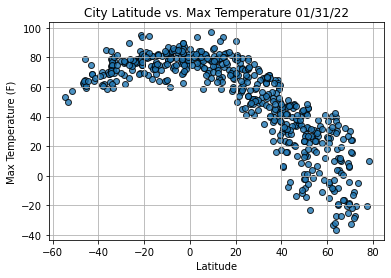

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

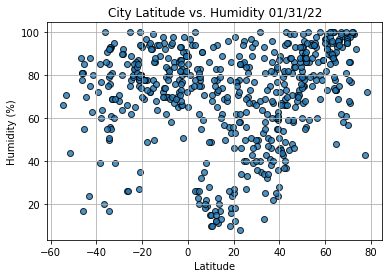

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

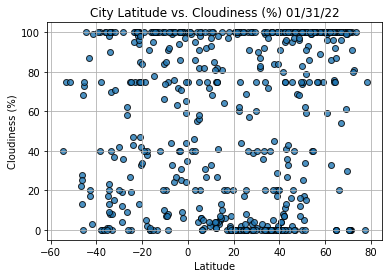

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

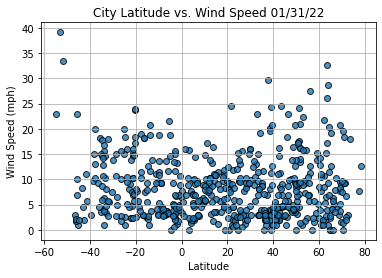

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()